# Classifiying Face Directions in R

<p>This notebook will demonstrate the use of a neural network to classify face images. The classifier will attempt to distinguish between faces turning left and faces turning right. We will vary the number of nodes in the hidden layer to examine the effect on performance.</p>

The images used within are sourced from the [CMU Face Image Data Set](http://archive.ics.uci.edu/ml/datasets/cmu+face+images). Images are available in sizes of 128x120, 64x60 and 32x30. 64x60 was chosen for this demonstration. There are 20 persons with varying different facial expressions and eye states. Two people were chosen for this demonstration, at33 and boland, where all facial expressions (neutral happy, sad and angry) and eye states (open, sunglasses) were chosen.

<p>First we load the appropriate libraries:</p>

In [4]:
install.packages('pixmap')

Installing package into 'C:/Users/herzf/R/win-library/3.6'
(as 'lib' is unspecified)



package 'pixmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\herzf\AppData\Local\Temp\Rtmp0Q0MQj\downloaded_packages


In [5]:
library(pixmap)
library(gdata)

Warning message:
"package 'pixmap' was built under R version 3.6.3"
Warning message:
"package 'gdata' was built under R version 3.6.3"
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.



gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.



gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.


Attaching package: 'gdata'


The following object is masked from 'package:stats':

    nobs


The following object is masked from 'package:utils':

    object.size


The following object is masked from 'package:base':

    startsWith




<p>Here are examples of the face data:</p>

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"


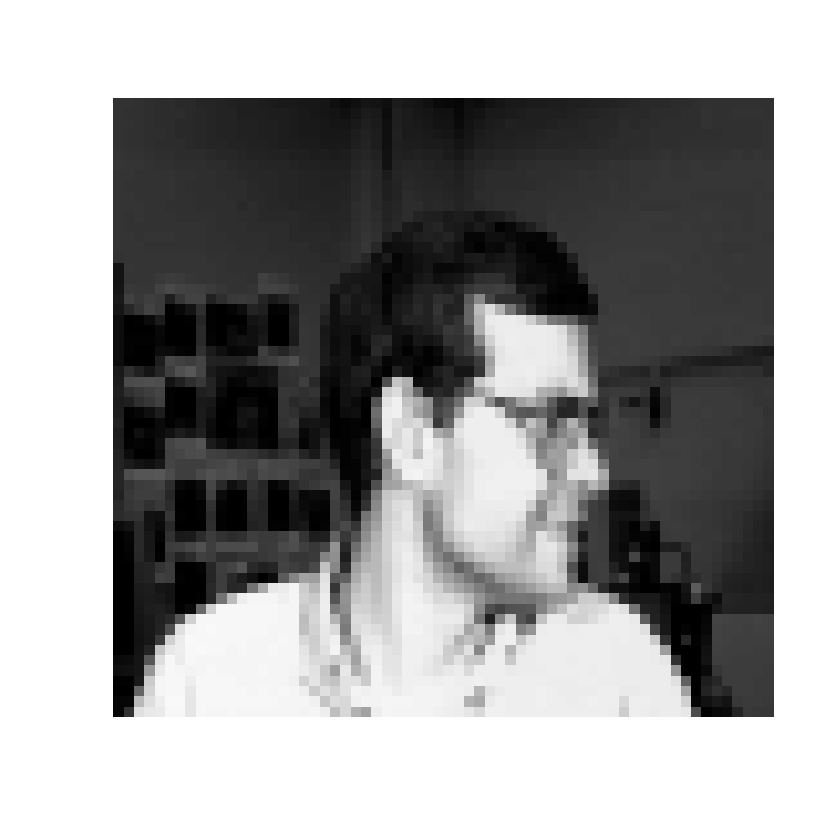

In [7]:
left1<-read.pnm(file="faces/at33_left_angry_open_2.pgm")
plot(left1)

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"


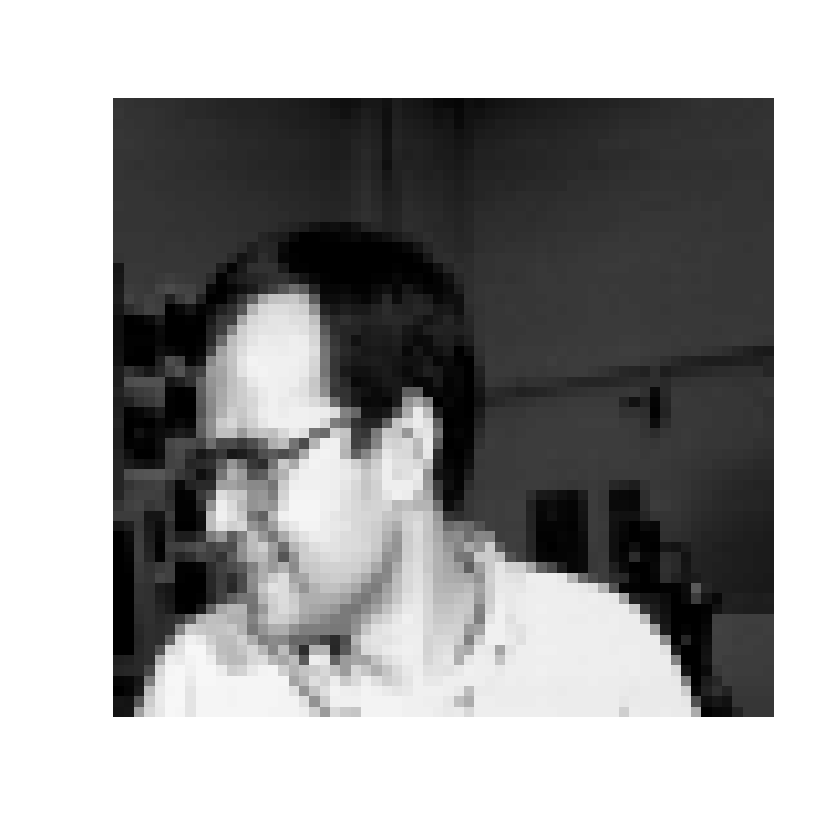

In [8]:
right1<-read.pnm(file="faces/at33_right_angry_open_2.pgm")
plot(right1)

<p>Next we train the network. We will randomize the data and then use 80% of it to train the neural network and 20% of it to test the data.</p>

<p>We first use the following function to load the data:</p>

In [10]:
loadImages <- function(pathName,fileNames, clasLabel) 
{
files<-list.files(path=pathName,pattern=fileNames,all.files=T,full.name=T,no..=T)
list_of_images=lapply(files,read.pnm)
plot(list_of_images[[1]])
n.images<-length(list_of_images)
image.matrix<-list_of_images[[1]]@grey
image.vector<-unmatrix(image.matrix,byrow=T)
for(ii in 2:n.images)
{
 i.matrix<-list_of_images[[ii]]@grey
 i.vector<-unmatrix(i.matrix,byrow=T)
 image.vector<-rbind(image.vector,i.vector)
}
image.frame<-data.frame(image.vector)
n.rows<-nrow(image.frame)
class1.label<-rep(clasLabel,n.rows)
image.frame<-cbind(image.frame,class1.label)
return (image.frame)
}

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is N

r1.c1     r1.c2     r1.c3     r1.c4     r1.c5     r1.c6    
image.vector 0.1951220 0.1951220 0.1869919 0.1788618 0.1707317 0.1707317
i.vector     0.2076923 0.2000000 0.2000000 0.1923077 0.1846154 0.1769231
i.vector.1   0.1885246 0.1803279 0.1721311 0.1639344 0.1639344 0.1557377
i.vector.2   0.2063492 0.1984127 0.1984127 0.1904762 0.1825397 0.1746032
i.vector.3   0.1750000 0.1750000 0.1666667 0.1666667 0.1583333 0.1500000
i.vector.4   0.2000000 0.1920000 0.1920000 0.1840000 0.1760000 0.1680000
i.vector.5   0.1983471 0.1900826 0.1818182 0.1735537 0.1735537 0.1652893
i.vector.6   0.1984127 0.1984127 0.1904762 0.1825397 0.1746032 0.1746032
i.vector.7   0.2416107 0.2281879 0.2214765 0.2147651 0.2147651 0.2080537
i.vector.8   0.2193548 0.2129032 0.2129032 0.2064516 0.2000000 0.1935484
i.vector.9   0.2432432 0.2297297 0.2229730 0.2162162 0.2094595 0.2094595
i.vector.10  0.2193548 0.2129032 0.2064516 0.2064516 0.2000000 0.1935484
i.vector.11  0.2236842 0.2171053 0.2171053 0.2105263 0.2105263 0.2039474
i.vector.12  0.2258065 0.2258065 0.2193548 0.2129032 0.2064516 0.2000000
i.vector.13  0.2400000 0.2266667 0.2200000 0.2133333 0.2133333 0.2066667
i.vector.14  0.2258065 0.2193548 0.2129032 0.2129032 0.2064516 0.2064516
             r1.c7     r1.c8     r1.c9     r1.c10    ... r60.c56   r60.c57  
image.vector 0.1626016 0.1626016 0.1463415 0.1463415 ... 0.9105691 0.2926829
i.vector     0.1692308 0.1692308 0.1615385 0.1538462 ... 0.8692308 0.5000000
i.vector.1   0.1557377 0.1475410 0.1393443 0.1311475 ... 0.9016393 0.9016393
i.vector.2   0.1746032 0.1666667 0.1587302 0.1587302 ... 0.9206349 0.6190476
i.vector.3   0.1500000 0.1416667 0.1333333 0.1250000 ... 0.9166667 0.9166667
i.vector.4   0.1680000 0.1600000 0.1520000 0.1440000 ... 0.8880000 0.5040000
i.vector.5   0.1570248 0.1487603 0.1487603 0.1404959 ... 0.9090909 0.9173554
i.vector.6   0.1666667 0.1587302 0.1587302 0.1507937 ... 0.8888889 0.5158730
i.vector.7   0.2013423 0.2013423 0.1946309 0.1879195 ... 0.2617450 0.2684564
i.vector.8   0.1870968 0.1806452 0.1806452 0.1741935 ... 0.2838710 0.2774194
i.vector.9   0.2027027 0.2027027 0.1959459 0.1891892 ... 0.2567568 0.2635135
i.vector.10  0.1870968 0.1806452 0.1741935 0.1677419 ... 0.2838710 0.2774194
i.vector.11  0.1973684 0.1907895 0.1842105 0.1842105 ... 0.2631579 0.2565789
i.vector.12  0.2000000 0.1870968 0.1870968 0.1806452 ... 0.2838710 0.2774194
i.vector.13  0.2066667 0.1933333 0.1933333 0.1866667 ... 0.2600000 0.2600000
i.vector.14  0.2000000 0.1935484 0.1870968 0.1741935 ... 0.2838710 0.2774194
             r60.c58     r60.c59    r60.c60    r60.c61   r60.c62   r60.c63  
image.vector 0.008130081 0.03252033 0.04065041 0.1382114 0.2195122 0.2113821
i.vector     0.007692308 0.03076923 0.03846154 0.1461538 0.2230769 0.2230769
i.vector.1   0.901639344 0.90163934 0.70491803 0.1885246 0.2213115 0.2131148
i.vector.2   0.023809524 0.03174603 0.03968254 0.1428571 0.2222222 0.2142857
i.vector.3   0.916666667 0.91666667 0.80833333 0.4416667 0.2166667 0.2166667
i.vector.4   0.000000000 0.02400000 0.04000000 0.1360000 0.2160000 0.2160000
i.vector.5   0.685950413 0.03305785 0.04132231 0.1322314 0.2066116 0.2066116
i.vector.6   0.007936508 0.03174603 0.03968254 0.1428571 0.2222222 0.2222222
i.vector.7   0.268456376 0.26845638 0.26174497 0.2617450 0.2617450 0.2550336
i.vector.8   0.264516129 0.25161290 0.23870968 0.2258065 0.2129032 0.2064516
i.vector.9   0.263513514 0.26351351 0.26351351 0.2635135 0.2567568 0.2500000
i.vector.10  0.264516129 0.25161290 0.23870968 0.2258065 0.2129032 0.2000000
i.vector.11  0.256578947 0.25657895 0.24342105 0.2368421 0.2236842 0.2105263
i.vector.12  0.264516129 0.25161290 0.23870968 0.2258065 0.2129032 0.2064516
i.vector.13  0.260000000 0.26666667 0.26666667 0.2600000 0.2600000 0.2533333
i.vector.14  0.264516129 0.25161290 0.23870968 0.2258065 0.2129032 0.2064516
             r60.c64   class1.label
image.vector 0.2113821 0           
i.vector     0.2153846 0           
i.vector.1   0.2049180 0           
i.vector.2

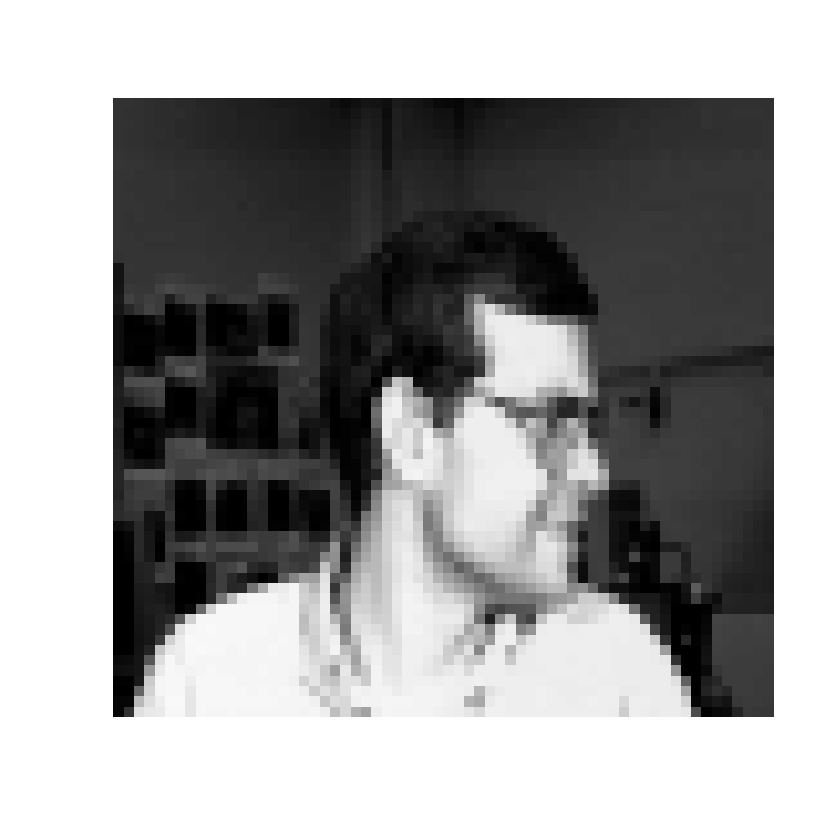

In [11]:
left.frame <- loadImages("faces/", "*left*.*", 0)
left.frame

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"
Warning message in rep(cellres, length = 2):
"'x' is N

r1.c1     r1.c2     r1.c3     r1.c4     r1.c5     r1.c6    
image.vector 0.2032520 0.1951220 0.1869919 0.1869919 0.1788618 0.1788618
i.vector     0.2204724 0.2125984 0.2047244 0.1889764 0.1811024 0.1811024
i.vector.1   0.1916667 0.1833333 0.1750000 0.1750000 0.1666667 0.1583333
i.vector.2   0.2016129 0.2016129 0.1935484 0.1935484 0.1854839 0.1774194
i.vector.3   0.1932773 0.1848739 0.1848739 0.1764706 0.1680672 0.1596639
i.vector.4   0.1920000 0.1920000 0.1920000 0.1840000 0.1760000 0.1680000
i.vector.5   0.1916667 0.1916667 0.1833333 0.1833333 0.1750000 0.1750000
i.vector.6   0.2016129 0.1935484 0.1935484 0.1854839 0.1774194 0.1693548
i.vector.7   0.2302632 0.2302632 0.2236842 0.2171053 0.2105263 0.2039474
i.vector.8   0.2356688 0.2229299 0.2229299 0.2165605 0.2101911 0.2038217
i.vector.9   0.2266667 0.2200000 0.2133333 0.2066667 0.2066667 0.2000000
i.vector.10  0.2307692 0.2243590 0.2243590 0.2179487 0.2115385 0.2051282
i.vector.11  0.2317881 0.2251656 0.2251656 0.2185430 0.2119205 0.2052980
i.vector.12  0.2371795 0.2307692 0.2243590 0.2179487 0.2179487 0.2051282
i.vector.13  0.2251656 0.2185430 0.2119205 0.2119205 0.2052980 0.1986755
i.vector.14  0.2307692 0.2243590 0.2179487 0.2115385 0.2115385 0.2051282
             r1.c7     r1.c8     r1.c9     r1.c10    ... r60.c56   r60.c57  
image.vector 0.1707317 0.1626016 0.1626016 0.1544715 ... 0.9186992 0.6747967
i.vector     0.1732283 0.1732283 0.1653543 0.1653543 ... 0.9212598 0.8031496
i.vector.1   0.1583333 0.1500000 0.1416667 0.1416667 ... 0.9166667 0.9166667
i.vector.2   0.1693548 0.1612903 0.1612903 0.1532258 ... 0.9274194 0.7500000
i.vector.3   0.1512605 0.1512605 0.1428571 0.1428571 ... 0.9243697 0.9243697
i.vector.4   0.1600000 0.1600000 0.1520000 0.1440000 ... 0.8960000 0.6800000
i.vector.5   0.1666667 0.1583333 0.1500000 0.1500000 ... 0.9166667 0.9166667
i.vector.6   0.1612903 0.1612903 0.1532258 0.1532258 ... 0.9274194 0.7500000
i.vector.7   0.2039474 0.1973684 0.1842105 0.1776316 ... 0.2434211 0.2105263
i.vector.8   0.2038217 0.1974522 0.1910828 0.1847134 ... 0.2993631 0.2675159
i.vector.9   0.1933333 0.1933333 0.1866667 0.1800000 ... 0.2933333 0.2266667
i.vector.10  0.1987179 0.1987179 0.1923077 0.1858974 ... 0.3012821 0.2692308
i.vector.11  0.1986755 0.1920530 0.1920530 0.1854305 ... 0.2516556 0.2119205
i.vector.12  0.2051282 0.1987179 0.1923077 0.1858974 ... 0.3333333 0.3782051
i.vector.13  0.1920530 0.1854305 0.1788079 0.1721854 ... 0.3178808 0.2185430
i.vector.14  0.2051282 0.1923077 0.1858974 0.1858974 ... 0.3076923 0.3076923
             r60.c58     r60.c59    r60.c60    r60.c61   r60.c62   r60.c63  
image.vector 0.008130081 0.03252033 0.04065041 0.1382114 0.2113821 0.2113821
i.vector     0.409448819 0.03149606 0.03937008 0.1338583 0.2125984 0.2204724
i.vector.1   0.916666667 0.91666667 0.81666667 0.4166667 0.2166667 0.2166667
i.vector.2   0.096774194 0.03225806 0.04032258 0.1451613 0.2177419 0.2177419
i.vector.3   0.915966387 0.91596639 0.82352941 0.5210084 0.2184874 0.2184874
i.vector.4   0.040000000 0.02400000 0.04000000 0.1360000 0.2000000 0.2000000
i.vector.5   0.608333333 0.03333333 0.04166667 0.1333333 0.2083333 0.2083333
i.vector.6   0.112903226 0.03225806 0.04032258 0.1451613 0.2258065 0.2177419
i.vector.7   0.184210526 0.35526316 0.31578947 0.3223684 0.3223684 0.3223684
i.vector.8   0.369426752 0.23566879 0.31847134 0.3184713 0.3121019 0.3121019
i.vector.9   0.160000000 0.32000000 0.32000000 0.3200000 0.3200000 0.3200000
i.vector.10  0.358974359 0.24358974 0.32051282 0.3205128 0.3205128 0.3141026
i.vector.11  0.172185430 0.35761589 0.31125828 0.3178808 0.3178808 0.3178808
i.vector.12  0.294871795 0.22435897 0.32051282 0.3141026 0.3076923 0.3012821
i.vector.13  0.165562914 0.28476821 0.31788079 0.3178808 0.3178808 0.3178808
i.vector.14  0.352564103 0.24358974 0.31410256 0.3141026 0.3141026 0.3141026
             r60.c64   class1.label
image.vector 0.2113821 1           
i.vector     0.2125984 1           
i.vector.1   0.2083333 1           
i.vector.2

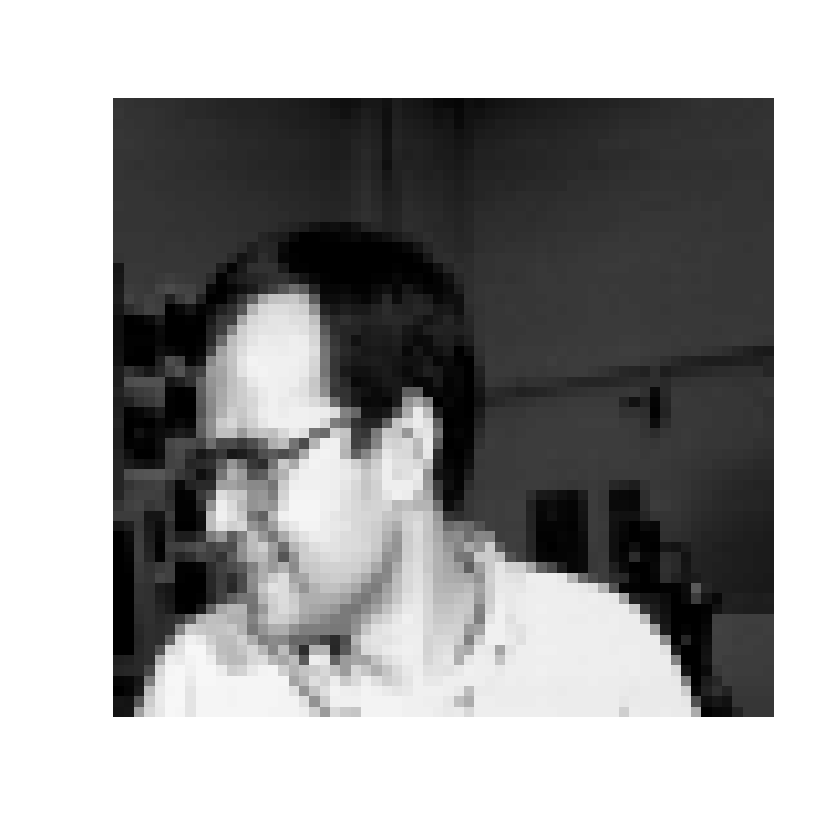

In [12]:
right.frame<-loadImages("faces/", "*right*.*", 1)
right.frame

In [13]:
total.frame<-rbind(left.frame,right.frame)
total.frame

r1.c1     r1.c2     r1.c3     r1.c4     r1.c5     r1.c6    
image.vector  0.1951220 0.1951220 0.1869919 0.1788618 0.1707317 0.1707317
i.vector      0.2076923 0.2000000 0.2000000 0.1923077 0.1846154 0.1769231
i.vector.1    0.1885246 0.1803279 0.1721311 0.1639344 0.1639344 0.1557377
i.vector.2    0.2063492 0.1984127 0.1984127 0.1904762 0.1825397 0.1746032
i.vector.3    0.1750000 0.1750000 0.1666667 0.1666667 0.1583333 0.1500000
i.vector.4    0.2000000 0.1920000 0.1920000 0.1840000 0.1760000 0.1680000
i.vector.5    0.1983471 0.1900826 0.1818182 0.1735537 0.1735537 0.1652893
i.vector.6    0.1984127 0.1984127 0.1904762 0.1825397 0.1746032 0.1746032
i.vector.7    0.2416107 0.2281879 0.2214765 0.2147651 0.2147651 0.2080537
i.vector.8    0.2193548 0.2129032 0.2129032 0.2064516 0.2000000 0.1935484
i.vector.9    0.2432432 0.2297297 0.2229730 0.2162162 0.2094595 0.2094595
i.vector.10   0.2193548 0.2129032 0.2064516 0.2064516 0.2000000 0.1935484
i.vector.11   0.2236842 0.2171053 0.2171053 0.2105263 0.2105263 0.2039474
i.vector.12   0.2258065 0.2258065 0.2193548 0.2129032 0.2064516 0.2000000
i.vector.13   0.2400000 0.2266667 0.2200000 0.2133333 0.2133333 0.2066667
i.vector.14   0.2258065 0.2193548 0.2129032 0.2129032 0.2064516 0.2064516
image.vector1 0.2032520 0.1951220 0.1869919 0.1869919 0.1788618 0.1788618
i.vector1     0.2204724 0.2125984 0.2047244 0.1889764 0.1811024 0.1811024
i.vector.15   0.1916667 0.1833333 0.1750000 0.1750000 0.1666667 0.1583333
i.vector.21   0.2016129 0.2016129 0.1935484 0.1935484 0.1854839 0.1774194
i.vector.31   0.1932773 0.1848739 0.1848739 0.1764706 0.1680672 0.1596639
i.vector.41   0.1920000 0.1920000 0.1920000 0.1840000 0.1760000 0.1680000
i.vector.51   0.1916667 0.1916667 0.1833333 0.1833333 0.1750000 0.1750000
i.vector.61   0.2016129 0.1935484 0.1935484 0.1854839 0.1774194 0.1693548
i.vector.71   0.2302632 0.2302632 0.2236842 0.2171053 0.2105263 0.2039474
i.vector.81   0.2356688 0.2229299 0.2229299 0.2165605 0.2101911 0.2038217
i.vector.91   0.2266667 0.2200000 0.2133333 0.2066667 0.2066667 0.2000000
i.vector.101  0.2307692 0.2243590 0.2243590 0.2179487 0.2115385 0.2051282
i.vector.111  0.2317881 0.2251656 0.2251656 0.2185430 0.2119205 0.2052980
i.vector.121  0.2371795 0.2307692 0.2243590 0.2179487 0.2179487 0.2051282
i.vector.131  0.2251656 0.2185430 0.2119205 0.2119205 0.2052980 0.1986755
i.vector.141  0.2307692 0.2243590 0.2179487 0.2115385 0.2115385 0.2051282
              r1.c7     r1.c8     r1.c9     r1.c10    ... r60.c56   r60.c57  
image.vector  0.1626016 0.1626016 0.1463415 0.1463415 ... 0.9105691 0.2926829
i.vector      0.1692308 0.1692308 0.1615385 0.1538462 ... 0.8692308 0.5000000
i.vector.1    0.1557377 0.1475410 0.1393443 0.1311475 ... 0.9016393 0.9016393
i.vector.2    0.1746032 0.1666667 0.1587302 0.1587302 ... 0.9206349 0.6190476
i.vector.3    0.1500000 0.1416667 0.1333333 0.1250000 ... 0.9166667 0.9166667
i.vector.4    0.1680000 0.1600000 0.1520000 0.1440000 ... 0.8880000 0.5040000
i.vector.5    0.1570248 0.1487603 0.1487603 0.1404959 ... 0.9090909 0.9173554
i.vector.6    0.1666667 0.1587302 0.1587302 0.1507937 ... 0.8888889 0.5158730
i.vector.7    0.2013423 0.2013423 0.1946309 0.1879195 ... 0.2617450 0.2684564
i.vector.8    0.1870968 0.1806452 0.1806452 0.1741935 ... 0.2838710 0.2774194
i.vector.9    0.2027027 0.2027027 0.1959459 0.1891892 ... 0.2567568 0.2635135
i.vector.10   0.1870968 0.1806452 0.1741935 0.1677419 ... 0.2838710 0.2774194
i.vector.11   0.1973684 0.1907895 0.1842105 0.1842105 ... 0.2631579 0.2565789
i.vector.12   0.2000000 0.1870968 0.1870968 0.1806452 ... 0.2838710 0.2774194
i.vector.13   0.2066667 0.1933333 0.1933333 0.1866667 ... 0.2600000 0.2600000
i.vector.14   0.2000000 0.1935484 0.1870968 0.1741935 ... 0.2838710 0.2774194
image.vector1 0.1707317 0.1626016 0.1626016 0.1544715 ... 0.9186992 0.6747967
i.vector1     0.1732283 0.1732283 0.1653543 0.1653543 ... 0.9212598 0.8031496
i.vector.15   0.1583333 0.1500000 0.1416667 0.1416667 ... 0.9166667 0.9166667
i.vector.21 


<p>Next we create the training and test sets:</p>


In [14]:
train.index<-sample(nrow(total.frame),nrow(total.frame)*0.8)
training.set<-total.frame[train.index,]
training.set

r1.c1     r1.c2     r1.c3     r1.c4     r1.c5     r1.c6    
i.vector.14   0.2258065 0.2193548 0.2129032 0.2129032 0.2064516 0.2064516
i.vector.7    0.2416107 0.2281879 0.2214765 0.2147651 0.2147651 0.2080537
i.vector.61   0.2016129 0.1935484 0.1935484 0.1854839 0.1774194 0.1693548
i.vector.141  0.2307692 0.2243590 0.2179487 0.2115385 0.2115385 0.2051282
i.vector.101  0.2307692 0.2243590 0.2243590 0.2179487 0.2115385 0.2051282
i.vector.91   0.2266667 0.2200000 0.2133333 0.2066667 0.2066667 0.2000000
i.vector      0.2076923 0.2000000 0.2000000 0.1923077 0.1846154 0.1769231
i.vector.111  0.2317881 0.2251656 0.2251656 0.2185430 0.2119205 0.2052980
i.vector.71   0.2302632 0.2302632 0.2236842 0.2171053 0.2105263 0.2039474
i.vector.15   0.1916667 0.1833333 0.1750000 0.1750000 0.1666667 0.1583333
i.vector.21   0.2016129 0.2016129 0.1935484 0.1935484 0.1854839 0.1774194
i.vector.81   0.2356688 0.2229299 0.2229299 0.2165605 0.2101911 0.2038217
image.vector1 0.2032520 0.1951220 0.1869919 0.1869919 0.1788618 0.1788618
i.vector.2    0.2063492 0.1984127 0.1984127 0.1904762 0.1825397 0.1746032
i.vector.3    0.1750000 0.1750000 0.1666667 0.1666667 0.1583333 0.1500000
i.vector.4    0.2000000 0.1920000 0.1920000 0.1840000 0.1760000 0.1680000
i.vector.11   0.2236842 0.2171053 0.2171053 0.2105263 0.2105263 0.2039474
i.vector1     0.2204724 0.2125984 0.2047244 0.1889764 0.1811024 0.1811024
i.vector.1    0.1885246 0.1803279 0.1721311 0.1639344 0.1639344 0.1557377
i.vector.6    0.1984127 0.1984127 0.1904762 0.1825397 0.1746032 0.1746032
i.vector.131  0.2251656 0.2185430 0.2119205 0.2119205 0.2052980 0.1986755
i.vector.121  0.2371795 0.2307692 0.2243590 0.2179487 0.2179487 0.2051282
image.vector  0.1951220 0.1951220 0.1869919 0.1788618 0.1707317 0.1707317
i.vector.10   0.2193548 0.2129032 0.2064516 0.2064516 0.2000000 0.1935484
i.vector.9    0.2432432 0.2297297 0.2229730 0.2162162 0.2094595 0.2094595
              r1.c7     r1.c8     r1.c9     r1.c10    ... r60.c56   r60.c57  
i.vector.14   0.2000000 0.1935484 0.1870968 0.1741935 ... 0.2838710 0.2774194
i.vector.7    0.2013423 0.2013423 0.1946309 0.1879195 ... 0.2617450 0.2684564
i.vector.61   0.1612903 0.1612903 0.1532258 0.1532258 ... 0.9274194 0.7500000
i.vector.141  0.2051282 0.1923077 0.1858974 0.1858974 ... 0.3076923 0.3076923
i.vector.101  0.1987179 0.1987179 0.1923077 0.1858974 ... 0.3012821 0.2692308
i.vector.91   0.1933333 0.1933333 0.1866667 0.1800000 ... 0.2933333 0.2266667
i.vector      0.1692308 0.1692308 0.1615385 0.1538462 ... 0.8692308 0.5000000
i.vector.111  0.1986755 0.1920530 0.1920530 0.1854305 ... 0.2516556 0.2119205
i.vector.71   0.2039474 0.1973684 0.1842105 0.1776316 ... 0.2434211 0.2105263
i.vector.15   0.1583333 0.1500000 0.1416667 0.1416667 ... 0.9166667 0.9166667
i.vector.21   0.1693548 0.1612903 0.1612903 0.1532258 ... 0.9274194 0.7500000
i.vector.81   0.2038217 0.1974522 0.1910828 0.1847134 ... 0.2993631 0.2675159
image.vector1 0.1707317 0.1626016 0.1626016 0.1544715 ... 0.9186992 0.6747967
i.vector.2    0.1746032 0.1666667 0.1587302 0.1587302 ... 0.9206349 0.6190476
i.vector.3    0.1500000 0.1416667 0.1333333 0.1250000 ... 0.9166667 0.9166667
i.vector.4    0.1680000 0.1600000 0.1520000 0.1440000 ... 0.8880000 0.5040000
i.vector.11   0.1973684 0.1907895 0.1842105 0.1842105 ... 0.2631579 0.2565789
i.vector1     0.1732283 0.1732283 0.1653543 0.1653543 ... 0.9212598 0.8031496
i.vector.1    0.1557377 0.1475410 0.1393443 0.1311475 ... 0.9016393 0.9016393
i.vector.6    0.1666667 0.1587302 0.1587302 0.1507937 ... 0.8888889 0.5158730
i.vector.131  0.1920530 0.1854305 0.1788079 0.1721854 ... 0.3178808 0.2185430
i.vector.121  0.2051282 0.1987179 0.1923077 0.1858974 ... 0.3333333 0.3782051
image.vector  0.1626016 0.1626016 0.1463415 0.1463415 ... 0.9105691 0.2926829
i.vector.10   0.1870968 0.1806452 0.1741935 0.1677419 ... 0.2838710 0.2774194
i.vector.9    0.2027027 0.2027027 0.1959459 0.1891892 ... 0.2567568 0.2635135
              r60.c58     r60.c59    r60.c60    r60.c61   r60.

In [15]:
test.set<-total.frame[-train.index,]
test.set

r1.c1     r1.c2     r1.c3     r1.c4     r1.c5     r1.c6    
i.vector.5  0.1983471 0.1900826 0.1818182 0.1735537 0.1735537 0.1652893
i.vector.8  0.2193548 0.2129032 0.2129032 0.2064516 0.2000000 0.1935484
i.vector.12 0.2258065 0.2258065 0.2193548 0.2129032 0.2064516 0.2000000
i.vector.13 0.2400000 0.2266667 0.2200000 0.2133333 0.2133333 0.2066667
i.vector.31 0.1932773 0.1848739 0.1848739 0.1764706 0.1680672 0.1596639
i.vector.41 0.1920000 0.1920000 0.1920000 0.1840000 0.1760000 0.1680000
i.vector.51 0.1916667 0.1916667 0.1833333 0.1833333 0.1750000 0.1750000
            r1.c7     r1.c8     r1.c9     r1.c10    ... r60.c56   r60.c57  
i.vector.5  0.1570248 0.1487603 0.1487603 0.1404959 ... 0.9090909 0.9173554
i.vector.8  0.1870968 0.1806452 0.1806452 0.1741935 ... 0.2838710 0.2774194
i.vector.12 0.2000000 0.1870968 0.1870968 0.1806452 ... 0.2838710 0.2774194
i.vector.13 0.2066667 0.1933333 0.1933333 0.1866667 ... 0.2600000 0.2600000
i.vector.31 0.1512605 0.1512605 0.1428571 0.1428571 ... 0.9243697 0.9243697
i.vector.41 0.1600000 0.1600000 0.1520000 0.1440000 ... 0.8960000 0.6800000
i.vector.51 0.1666667 0.1583333 0.1500000 0.1500000 ... 0.9166667 0.9166667
            r60.c58   r60.c59    r60.c60    r60.c61   r60.c62   r60.c63  
i.vector.5  0.6859504 0.03305785 0.04132231 0.1322314 0.2066116 0.2066116
i.vector.8  0.2645161 0.25161290 0.23870968 0.2258065 0.2129032 0.2064516
i.vector.12 0.2645161 0.25161290 0.23870968 0.2258065 0.2129032 0.2064516
i.vector.13 0.2600000 0.26666667 0.26666667 0.2600000 0.2600000 0.2533333
i.vector.31 0.9159664 0.91596639 0.82352941 0.5210084 0.2184874 0.2184874
i.vector.41 0.0400000 0.02400000 0.04000000 0.1360000 0.2000000 0.2000000
i.vector.51 0.6083333 0.03333333 0.04166667 0.1333333 0.2083333 0.2083333
            r60.c64   class1.label
i.vector.5  0.1983471 0           
i.vector.8  0.2000000 0           
i.vector.12 0.1935484 0           
i.vector.13 0.2400000 0           
i.vector.31 0.2100840 1           
i.vector.41 0.2000000 1           
i.vector.51 0.2000000 1

<p>Next we train the classifiers, varying the number of hidden nodes:</p>

In [16]:
library(neuralnet)
myform <- as.formula(paste('class1.label ~ ',paste(names(training.set[!names(training.set) %in% 'class1.label']), collapse = ' + ')))
face.classifier.3 <- neuralnet(myform, training.set, hidden = 3, rep=100, linear.output = FALSE, threshold = 0.1)
summary(face.classifier.3)

Warning message:
"package 'neuralnet' was built under R version 3.6.3"


                    Length  Class      Mode    
call                      7 -none-     call    
response                 25 -none-     numeric 
covariate             96000 -none-     numeric 
model.list                2 -none-     list    
err.fct                   1 -none-     function
act.fct                   1 -none-     function
linear.output             1 -none-     logical 
data                   3841 data.frame list    
exclude                   0 -none-     NULL    
net.result              100 -none-     list    
weights                 100 -none-     list    
generalized.weights     100 -none-     list    
startweights            100 -none-     list    
result.matrix       1153000 -none-     numeric 

In [41]:
layers <- c(3,5,7,9,11)
classifiers <- vector("list", length(layers))
i <- 1
for (dim in layers) {
    classifiers[[i]] <- neuralnet(myform, training.set, hidden = dim, rep=100, linear.output = FALSE, threshold = 0.1)
    summary(classifiers[[i]])
    i <- i+1
}

<p>Next we use the models we have built to make predictions on the test set and produce classifications and confusion matrices:</p>

In [65]:
predictions <- vector("list", length(layers))
classifications <- vector("list", length(layers))
i <- 1
for (classifier in classifiers) {
    cat(paste("classifier", i, "with", layers[[i]], "hidden layers.\n"))
    cat("\npredictions on test frames:")
    predictions[[i]] <- compute(classifier, test.set[,-class.index])
    print(predictions[[i]]$net.result)
    
    cat("\nclassifications")
    classifications[[i]] <- ifelse(predictions[[i]]$net.result>0.5,1,0)
    print(classifications[[i]])
    cat("\nconfusion matrix")
    print(table(test.set[,class.index], classifications[[i]]))
    cat("\n\n\n")
    i <- i+1
}

classifier 1 with 3 hidden layers.

predictions on test frames:                [,1]
i.vector.5  0.119548
i.vector.8  0.119548
i.vector.12 0.119548
i.vector.13 0.119548
i.vector.31 0.908843
i.vector.41 0.908843
i.vector.51 0.908843

binary classifications            [,1]
i.vector.5     0
i.vector.8     0
i.vector.12    0
i.vector.13    0
i.vector.31    1
i.vector.41    1
i.vector.51    1

confusion matrix   
    0 1
  0 4 0
  1 0 3



classifier 2 with 5 hidden layers.

predictions on test frames:                 [,1]
i.vector.5  0.5199672
i.vector.8  0.5199672
i.vector.12 0.5199672
i.vector.13 0.5199672
i.vector.31 0.5199672
i.vector.41 0.5199672
i.vector.51 0.5199672

binary classifications            [,1]
i.vector.5     1
i.vector.8     1
i.vector.12    1
i.vector.13    1
i.vector.31    1
i.vector.41    1
i.vector.51    1

confusion matrix   
    1
  0 4
  1 3



classifier 3 with 7 hidden layers.

predictions on test frames:                 [,1]
i.vector.5  0.5700663
i.vector.8  0.2

<p>We summarize the accuracy results of all classifiers in a table:</p>

In [66]:
accuracy.vector<-c(0.5, 0.95, 0.5, 1, 1)
hidden.vector<-c(3, 5, 7, 9, 11)
accuracy.frame<-data.frame(as.data.frame(accuracy.vector))
hidden.frame<-data.frame(as.data.frame(hidden.vector))
final.frame<-cbind(accuracy.frame, hidden.frame)
names(final.frame)<-c("Accuracy", "Hidden Nodes")
final.frame

Accuracy Hidden Nodes
1 0.50      3          
2 0.95      5          
3 0.50      7          
4 1.00      9          
5 1.00     11